In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
from collections import Counter

In [9]:
df = pd.read_csv('winequality.csv')
print(df.shape)
df.head()

(6463, 13)


,type1,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [20]:
data = df.iloc[:, 1:3]
print(data.shape)
data.head()

(6463, 2)


,fixed acidity,volatile acidity
0,7.0,0.27
1,6.3,0.30
2,8.1,0.28
3,7.2,0.23
4,7.2,0.23


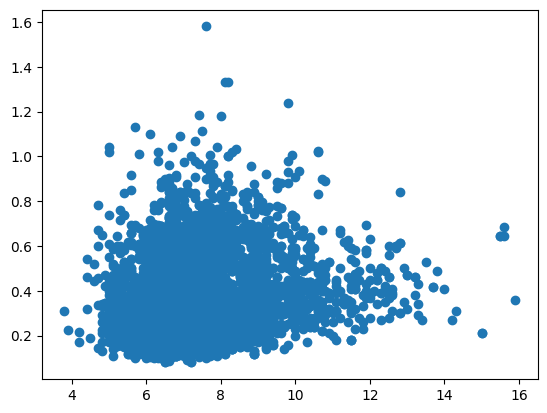

In [14]:
plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.show()

In [12]:
dbs = DBSCAN(eps=0.2, min_samples=20).fit(data)
dbs

DBSCAN(eps=0.2, min_samples=20)

In [23]:
print(Counter(dbs.labels_))
df_anom = pd.DataFrame(data)
print(df_anom[dbs.labels_ == -1])

Counter({0: 6281, -1: 117, 1: 40, 2: 25})
      fixed acidity  volatile acidity
1502           14.2             0.270
1927            9.9             1.005
2130            9.8             0.930
2297            4.6             0.445
2601            4.5             0.190
...             ...               ...
6131            6.3             1.020
6169            7.6             1.580
6182            8.0             1.180
6409           11.1             0.440
6414           11.2             0.400

[117 rows x 2 columns]


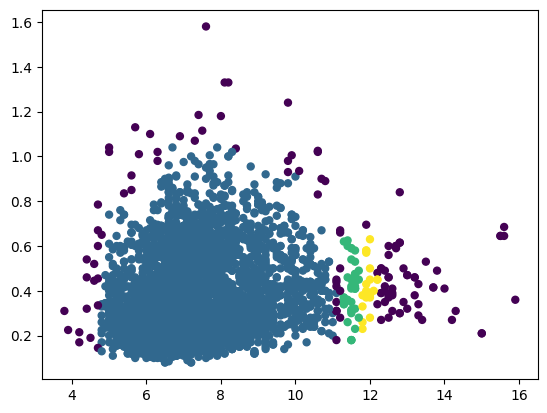

In [28]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=dbs.labels_, s=25)
plt.show()

In [29]:
dbs.core_sample_indices_

array([   0,    1,    2, ..., 6460, 6461, 6462])